# Billionaires 2023 Exploratory Data Analysis
**Author:** Rebecca Chu
***

## Overview

This notebook contains data preparation of 2023 billionaire statistics for the data visualisation: ... . 

The original Billionaires dataset was split into four smaller dataframes to explore the following:
* Is wealth concentrated in certain countries? Which countries have the highest number of billionaires?
* Is there a correlation between economic and education indicators with the presence of wealth?
* What common traits do billionaires share? Which star sign/ birth month is the most popular among billionaries?

These can be found in the `data_prepared` folder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

Data from `Billionaires Statistics Dataset.csv` was sourced from Kaggle and can be found here: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/. It contains statistics on the world's billionaires as sourced on the 4th of April, 2023.

In [2]:
bill = pd.read_csv('./data/Billionaires Statistics Dataset.csv')
bill.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


## Data Preparation
#### Billionaires Statistics Dataset

In [3]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

As I could not verify the accuracy of the economic indicators, education or tax data, these columns were excluded from analysis and statistics were sourced elsewhere. 

In [4]:
# creating new dataframe with relevant columns 
bill = bill[['rank',
             'finalWorth',
             'personName',
             'age',
             'country',
             'city',
             'source',
             'industries',
             'countryOfCitizenship',
             'selfMade',
             'gender',
             'birthDate']]

In [5]:
# converting birthDate into datetime datatype
bill.birthDate = pd.to_datetime(bill.birthDate)

In [6]:
# converting finalWorth to billions 
bill.finalWorth = bill.finalWorth * 1000000 

### Is wealth concentrated in certain countries?

The Human Development Index (HDI) is a summary metric of average achievement in key dimensions of human development and is calculated using a various indicators such as life expectancy, schooling, GDP per capita and the multidimensional poverty index.

Countries with a higher HDI have more stable governments, affordable and accessible education and healthcare, higher life expectancies and quality of life. 

The below dataset was retrieved from the Human Development Report Office website (https://hdr.undp.org/data-center/human-development-index#/indicies/HDI). 

In [7]:
hdi = pd.read_csv('./data/HDR21-22_Statistical_Annex_HDI_Table.csv', skiprows=4)
hdi.head(10)

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Unnamed: 3,Life expectancy at birth,Unnamed: 5,Expected years of schooling,Unnamed: 7,Mean years of schooling,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2021,NaN,2021,NaN,2021,a,2021,a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Switzerland,0.962,NaN,84.0,NaN,16.5,NaN,13.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Norway,0.961,NaN,83.2,NaN,18.2,c,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,Iceland,0.959,NaN,82.7,NaN,19.2,c,13.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,"Hong Kong, China (SAR)",0.952,NaN,85.5,d,17.3,NaN,12.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,Australia,0.951,NaN,84.5,NaN,21.1,c,12.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,Denmark,0.948,NaN,81.4,NaN,18.7,c,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,Sweden,0.947,NaN,83.0,NaN,19.4,c,12.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
hdi.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Human Development Index (HDI) ',
       'Unnamed: 3', 'Life expectancy at birth', 'Unnamed: 5',
       'Expected years of schooling', 'Unnamed: 7', 'Mean years of schooling',
       'Unnamed: 9', 'Gross national income (GNI) per capita', 'Unnamed: 11',
       'GNI per capita rank minus HDI rank', 'Unnamed: 13', 'HDI rank',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [9]:
# selecting relevant columns to work with
hdi = hdi[['Unnamed: 0', 
           'Unnamed: 1', 
           'Human Development Index (HDI) ', 
           'Life expectancy at birth',
           'Expected years of schooling', 
           'Mean years of schooling',
           'Gross national income (GNI) per capita']]

In [10]:
# renaming columns
hdi.rename(
    columns={
        'Unnamed: 0': 'hdi_rank_2021', 
        'Unnamed: 1': 'country', 
        'Human Development Index (HDI) ': 'hdi', 
        'Life expectancy at birth': 'life_expectancy', 
        'Expected years of schooling': 'expected_years_schooling',
        'Mean years of schooling': 'mean_years_schooling',
        'Gross national income (GNI) per capita': 'gni_per_capita'
    }, 
    inplace=True)

In [11]:
hdi.head()

,hdi_rank_2021,country,hdi,life_expectancy,expected_years_schooling,mean_years_schooling,gni_per_capita
0,HDI rank,Country,Value,(years),(years),(years),(2017 PPP $)
1,NaN,NaN,2021,2021,2021,2021,2021
2,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN
3,1,Switzerland,0.962,84.0,16.5,13.9,"66,933"
4,2,Norway,0.961,83.2,18.2,13.0,"64,660"


In [12]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   hdi_rank_2021             192 non-null    object
 1   country                   261 non-null    object
 2   hdi                       212 non-null    object
 3   life_expectancy           212 non-null    object
 4   expected_years_schooling  212 non-null    object
 5   mean_years_schooling      212 non-null    object
 6   gni_per_capita            212 non-null    object
dtypes: object(7)
memory usage: 15.0+ KB


In [13]:
# selecting rows where hdi_rank_2021 contains a value
hdi = hdi[hdi.hdi_rank_2021.notna()].reset_index(drop=True)

In [14]:
# dropping the first row 
hdi = hdi.drop(0)

In [15]:
# removing special characters from gni_per_capita
hdi.gni_per_capita = hdi.gni_per_capita.map(lambda x: x.replace(',',''))

In [16]:
# converting values to numeric datatypes 
for i in hdi.columns:
    try: 
        hdi[f'{i}'] = pd.to_numeric(hdi[f'{i}'])
    except:
        pass

In [17]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 1 to 191
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hdi_rank_2021             191 non-null    int64  
 1   country                   191 non-null    object 
 2   hdi                       191 non-null    float64
 3   life_expectancy           191 non-null    float64
 4   expected_years_schooling  191 non-null    float64
 5   mean_years_schooling      191 non-null    float64
 6   gni_per_capita            191 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 10.6+ KB


In [18]:
# confirming the maximum number of countries in the dataset
hdi.hdi_rank_2021.max()

191

HDI is divided into four tiers:

* Very high human development (0.8-1.0)
* High human development (0.7-0.79)
* Medium human development (0.55-0.70)
* Low human development (below 0.55)

In [19]:
# creating a new column with corresponding HDI tiers
hdi['hdi_tier'] = pd.cut(hdi.hdi, bins=[0, 0.55, 0.7, 0.8, 1], labels=['Low', 'Medium', 'High', 'Very high'])

In [20]:
hdi.head()

,hdi_rank_2021,country,hdi,life_expectancy,expected_years_schooling,mean_years_schooling,gni_per_capita,hdi_tier
1,1,Switzerland,0.962,84.0,16.5,13.9,66933,Very high
2,2,Norway,0.961,83.2,18.2,13.0,64660,Very high
3,3,Iceland,0.959,82.7,19.2,13.8,55782,Very high
4,4,"Hong Kong, China (SAR)",0.952,85.5,17.3,12.2,62607,Very high
5,5,Australia,0.951,84.5,21.1,12.7,49238,Very high


#### Joining the HDI dataframe to Billionaries (Country)

In [21]:
# creating a new df without rows where country is missing
bill_country = bill[bill.country.notna()].reset_index(drop=True)

In [22]:
# identifying values that are in bill_country.country but are not in hdi.country
bill_country.country.loc[~bill_country.country.isin(hdi.country)].unique()

array(['Hong Kong', 'Russia', 'Monaco', 'Czech Republic', 'South Korea',
       'Taiwan', 'Eswatini (Swaziland)', 'Cayman Islands', 'Turkey',
       'Vietnam', 'Bermuda', 'British Virgin Islands', 'Guernsey',
       'Turks and Caicos Islands', 'Tanzania'], dtype=object)

In [23]:
# vice versa to identify 'duplicate' countries under a different name
hdi.country.loc[~hdi.country.isin(bill_country.country)].unique()

array(['Iceland', 'Hong Kong, China (SAR)', 'Korea (Republic of)',
       'Malta', 'Slovenia', 'Estonia', 'Czechia', 'Lithuania',
       'Saudi Arabia', 'Croatia', 'San Marino', 'Türkiye', 'Montenegro',
       'Kuwait', 'Brunei Darussalam', 'Russian Federation',
       'Trinidad and Tobago', 'Costa Rica', 'Belarus', 'Panama',
       'Mauritius', 'Serbia', 'Albania', 'Bulgaria', 'Grenada',
       'Barbados', 'Antigua and Barbuda', 'Seychelles', 'Sri Lanka',
       'Bosnia and Herzegovina', 'Saint Kitts and Nevis',
       'Iran (Islamic Republic of)', 'North Macedonia',
       'Dominican Republic', 'Moldova (Republic of)', 'Palau', 'Cuba',
       'Saint Vincent and the Grenadines', 'Maldives', 'Azerbaijan',
       'Tonga', 'Turkmenistan', 'Ecuador', 'Mongolia', 'Tunisia', 'Fiji',
       'Suriname', 'Dominica', 'Jordan', 'Libya', 'Paraguay',
       'Palestine, State of', 'Saint Lucia', 'Guyana', 'Jamaica', 'Samoa',
       'Gabon', 'Viet Nam', 'Botswana',
       'Bolivia (Plurinational Sta

Taking a look at the list of countries that are either in `hdi.country` or `bill_country.country` but not both, we can see that some countries are listed under different names. 

* Hong Kong vs. Hong Kong, China (SAR)
* Russia vs. Russian Federation
* Czech Republic vs. Czechia
* South Korea vs. Korea (Republic of)
* Eswatini (Swaziland) vs. Eswatini (Kingdom of)
* Turkey vs. Türkiye
* Vietnam vs. Viet Nam
* Tanzania vs. Tanzania (United Republic of)
  
I renamed these countries in `hdi`. 

In [24]:
bill_country.country.replace({'Hong Kong': 'Hong Kong, China (SAR)', 
                     'Russia': 'Russian Federation', 
                     'Czech Republic': 'Czechia', 
                     'South Korea': 'Korea (Republic of)', 
                     'Eswatini (Swaziland)': 'Eswatini (Kingdom of)', 
                     'Turkey': 'Türkiye',
                     'Vietnam': 'Viet Nam',
                     'Tanzania': 'Tanzania (United Republic of)'}, inplace=True)

In [25]:
# merging hdi to bill_country
bill_country = bill_country.merge(hdi, on='country', how='left')

In [26]:
bill_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   rank                      2602 non-null   int64         
 1   finalWorth                2602 non-null   int64         
 2   personName                2602 non-null   object        
 3   age                       2549 non-null   float64       
 4   country                   2602 non-null   object        
 5   city                      2568 non-null   object        
 6   source                    2602 non-null   object        
 7   industries                2602 non-null   object        
 8   countryOfCitizenship      2602 non-null   object        
 9   selfMade                  2602 non-null   bool          
 10  gender                    2602 non-null   object        
 11  birthDate                 2538 non-null   datetime64[ns]
 12  hdi_rank_2021       

In [27]:
bill_country.countryOfCitizenship.value_counts()

countryOfCitizenship
United States           734
China                   491
India                   166
Germany                 116
Russia                  104
                       ... 
Venezuela                 1
Algeria                   1
Portugal                  1
Eswatini (Swaziland)      1
Bangladesh                1
Name: count, Length: 76, dtype: int64

### Economic and Education Indicators

The following economic and education indicators were sourced from The World Bank website (https://data.worldbank.org/indicator) on the 15th of November, 2023. 

* **GDP (current US$):**
  GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.
* **Tax revenue (% of GDP):** Tax revenue refers to compulsory transfers to the central government for public purposes. Certain compulsory transfers such as fines, penalties, and most social security contributions are excluded. Refunds and corrections of erroneously collected tax revenue are treated as negative revenue.
* **School enrollment, primary (% gross):**
  Gross enrollment ratio is the ratio of total enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education shown. Primary education provides children with basic reading, writing, and mathematics skills along with an elementary understanding of such subjects as history, geography, natural science, social science, art, and music.
* **School enrollment, tertiary (% gross):**
  Gross enrollment ratio is the ratio of total enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education shown. Tertiary education, whether or not to an advanced research qualification, normally requires, as a minimum condition of admission, the successful completion of education at the secondary level.

In [28]:
gdp = pd.read_csv('./data/GDP_WorldBank.csv', skiprows=4)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN


In [29]:
gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [30]:
gdp.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              134
                 ... 
2019                9
2020                9
2021               15
2022               33
Unnamed: 67       266
Length: 68, dtype: int64

In [31]:
# filling in missing 2022 data with the latest available data
gdp = gdp.ffill(axis=1)

In [32]:
# updating dataframe with latest statistics
gdp = gdp[['Country Name', '2022']].rename(columns={'2022':'gdp_2022'})

gdp['gdp_2022'].value_counts()

gdp_2022
NY.GDP.MKTP.CD      4
2047347019065.53    2
4361631457999.02    2
13969605582.5202    1
40828247302.4851    1
                   ..
95003333381.1936    1
6123000000.0        1
15357537068.3434    1
61535768880816.7    1
20678055597.7345    1
Name: count, Length: 261, dtype: int64

In [33]:
gdp = gdp[gdp['gdp_2022'] != 'NY.GDP.MKTP.CD']

gdp.gdp_2022 = pd.to_numeric(gdp.gdp_2022)

In [34]:
gdp.head()

,Country Name,gdp_2022
0,Aruba,3.126019e+09
1,Africa Eastern and Southern,1.169484e+12
2,Afghanistan,1.458314e+10
3,Africa Western and Central,8.778633e+11
4,Angola,1.067136e+11


#### Tax Revenue as a % of GDP

In [35]:
tax_rev = pd.read_csv('./data/Tax_Revenue_GDP_WorldBank.csv', skiprows=4)

tax_rev.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2019              112
2020              117
2021              137
2022              266
Unnamed: 67       266
Length: 68, dtype: int64

In [36]:
tax_rev = tax_rev.ffill(axis=1)
tax_rev = tax_rev[['Country Name', '2021']].rename(columns={'2021':'tax_rev_2021'})

tax_rev['tax_rev_2021'].value_counts()

tax_rev_2021
GC.TAX.TOTL.GD.ZS    70
8.509768033518        2
11.721278626751       2
16.1101894275061      1
7.45946065253922      1
                     ..
18.2047799785766      1
9.46207435827386      1
5.37156734537771      1
25.3409108810727      1
7.21476500513885      1
Name: count, Length: 195, dtype: int64

In [37]:
tax_rev = tax_rev[tax_rev['tax_rev_2021'] != 'GC.TAX.TOTL.GD.ZS']

tax_rev.tax_rev_2021 = pd.to_numeric(tax_rev.tax_rev_2021)

In [38]:
tax_rev.head()

,Country Name,tax_rev_2021
1,Africa Eastern and Southern,18.613436
2,Afghanistan,9.898451
4,Angola,10.090386
5,Albania,18.198589
7,Arab World,5.408225


#### Education

In [39]:
edu_primary = pd.read_csv('./data/School_enrollment_primary.csv', skiprows=4)

edu_primary.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2019               54
2020               62
2021               67
2022              139
Unnamed: 67       266
Length: 68, dtype: int64

In [40]:
edu_primary = edu_primary.ffill(axis=1)
edu_primary = edu_primary[['Country Name', '2022']].rename(columns={'2022':'edu_primary_2022'})

edu_primary['edu_primary_2022'].value_counts()

edu_primary_2022
SE.PRM.ENRR         9
105.089416503906    2
98.8512268066406    2
115.184593200684    1
101.075828552246    1
                   ..
77.8290481567383    1
90.4738388061523    1
99.8471603393555    1
103.451057434082    1
96.0151443481445    1
Name: count, Length: 256, dtype: int64

In [41]:
edu_primary = edu_primary[edu_primary['edu_primary_2022'] != 'SE.PRM.ENRR']

edu_primary.edu_primary_2022 = pd.to_numeric(edu_primary.edu_primary_2022)

In [42]:
edu_primary.head()

,Country Name,edu_primary_2022
0,Aruba,115.184593
1,Africa Eastern and Southern,104.882607
2,Afghanistan,110.007507
3,Africa Western and Central,89.953041
4,Angola,88.574867


In [43]:
edu_tertiary = pd.read_csv('./data/School_enrollment_tertiary.csv', skiprows=4)

edu_tertiary.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2019               84
2020               91
2021              110
2022              176
Unnamed: 67       266
Length: 68, dtype: int64

In [44]:
edu_tertiary = edu_tertiary.ffill(axis=1)
edu_tertiary = edu_tertiary[['Country Name', '2022']].rename(columns={'2022':'edu_tertiary_2022'})

edu_tertiary['edu_tertiary_2022'].value_counts()

edu_tertiary_2022
SE.TER.ENRR         16
27.2942008972168     2
9.39892959594727     2
18.4336795806885     1
43.8433609008789     1
                    ..
18.6944980621338     1
11.6349601745605     1
79.2583465576172     1
104.223243713379     1
9.72360515594482     1
Name: count, Length: 249, dtype: int64

In [45]:
edu_tertiary = edu_tertiary[edu_tertiary['edu_tertiary_2022'] != 'SE.TER.ENRR']

edu_tertiary.edu_tertiary_2022 = pd.to_numeric(edu_tertiary.edu_tertiary_2022)

In [46]:
edu_tertiary.head()

,Country Name,edu_tertiary_2022
0,Aruba,18.433680
1,Africa Eastern and Southern,8.850520
2,Afghanistan,10.858440
3,Africa Western and Central,10.059090
4,Angola,11.061359


In [47]:
# joining all four tables together
wb = gdp.merge(tax_rev, 
               on='Country Name', 
               how='outer').merge(edu_primary, 
                                  on='Country Name',
                                  how='outer').merge(edu_tertiary,
                                                     on='Country Name',
                                                     how='outer')

In [48]:
wb.rename(columns={'Country Name':'country'}, inplace=True)

# identifying values that are in bill_country.country but are not in wb.country
bill_country.country.loc[~bill_country.country.isin(wb.country)].unique()

array(['Hong Kong, China (SAR)', 'Korea (Republic of)', 'Taiwan', 'Egypt',
       'Eswatini (Kingdom of)', 'Bahamas', 'Türkiye', 'Guernsey',
       'Slovakia', 'Tanzania (United Republic of)'], dtype=object)

In [49]:
# vice versa to identify 'duplicate' countries under a different name
wb.country.loc[~wb.country.isin(bill_country.country)].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
       'American Samoa', 'Antigua and Barbuda', 'Azerbaijan', 'Burundi',
       'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia',
       'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Central Europe and the Baltics',
       'Channel Islands', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Djibouti',
       'Dominica', 'Dominican Republic',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Ecuador', 'Egypt, Arab Rep.',
       'Euro area', 'Eritrea', 'Estonia', 'Ethiop

In [50]:
wb.country.replace({'Hong Kong SAR, China': 'Hong Kong, China (SAR)',
                    'Korea, Rep.': 'Korea (Republic of)', 
                    'Egypt, Arab Rep.': 'Egypt',
                    'Eswatini': 'Eswatini (Kingdom of)',
                    'Bahamas, The': 'Bahamas', 
                    'Turkiye': 'Türkiye',
                    'Slovak Republic': 'Slovakia',
                    'Tanzania': 'Tanzania (United Republic of)'}, inplace=True)

In [51]:
bill_country = bill_country.merge(wb, on='country', how='left')

In [52]:
bill_country.head()

,rank,finalWorth,personName,age,country,city,source,industries,countryOfCitizenship,selfMade,...,hdi,life_expectancy,expected_years_schooling,mean_years_schooling,gni_per_capita,hdi_tier,gdp_2022,tax_rev_2021,edu_primary_2022,edu_tertiary_2022
0,1,211000000000,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,False,...,0.903,82.5,15.8,11.6,45937.0,Very high,2.782905e+12,23.968339,102.744186,68.974854
1,2,180000000000,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,True,...,0.921,77.2,16.3,13.7,64765.0,Very high,2.546270e+13,11.233620,98.305489,84.855087
2,3,114000000000,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,True,...,0.921,77.2,16.3,13.7,64765.0,Very high,2.546270e+13,11.233620,98.305489,84.855087
3,4,107000000000,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,True,...,0.921,77.2,16.3,13.7,64765.0,Very high,2.546270e+13,11.233620,98.305489,84.855087
4,5,106000000000,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,True,...,0.921,77.2,16.3,13.7,64765.0,Very high,2.546270e+13,11.233620,98.305489,84.855087


In [53]:
bill_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   rank                      2602 non-null   int64         
 1   finalWorth                2602 non-null   int64         
 2   personName                2602 non-null   object        
 3   age                       2549 non-null   float64       
 4   country                   2602 non-null   object        
 5   city                      2568 non-null   object        
 6   source                    2602 non-null   object        
 7   industries                2602 non-null   object        
 8   countryOfCitizenship      2602 non-null   object        
 9   selfMade                  2602 non-null   bool          
 10  gender                    2602 non-null   object        
 11  birthDate                 2538 non-null   datetime64[ns]
 12  hdi_rank_2021       

#### Movement

In [54]:
bill_movement = bill_country[['rank', 'finalWorth', 'personName', 'country', 'industries', 'countryOfCitizenship']].copy()

In [55]:
movement = []

for i,v in enumerate(bill_movement.countryOfCitizenship):
    if bill_movement.countryOfCitizenship[i] == bill_movement.country[i]: 
        movement.append('False')
    else:
        movement.append('True')

bill_movement['movement?'] = movement

In [56]:
bill_movement = bill_movement[bill_movement['movement?'] == 'True']

In [57]:
bill_movement['industries'].value_counts()

industries
Finance & Investments         67
Diversified                   48
Fashion & Retail              46
Real Estate                   43
Technology                    43
Manufacturing                 39
Energy                        32
Metals & Mining               30
Food & Beverage               29
Healthcare                    26
Construction & Engineering    13
Automotive                    11
Service                       10
Logistics                     10
Media & Entertainment         10
Telecom                        8
Gambling & Casinos             6
Sports                         2
Name: count, dtype: int64

### Are billionaries Self Made?
#### Breaking it down by Age and Industry

In [58]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rank                  2640 non-null   int64         
 1   finalWorth            2640 non-null   int64         
 2   personName            2640 non-null   object        
 3   age                   2575 non-null   float64       
 4   country               2602 non-null   object        
 5   city                  2568 non-null   object        
 6   source                2640 non-null   object        
 7   industries            2640 non-null   object        
 8   countryOfCitizenship  2640 non-null   object        
 9   selfMade              2640 non-null   bool          
 10  gender                2640 non-null   object        
 11  birthDate             2564 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(7)
memory usage:

In [59]:
# looking at the % of self-made billionaires
bill.selfMade.value_counts(normalize=True)

selfMade
True     0.686364
False    0.313636
Name: proportion, dtype: float64

### Billionaire Birthdays and Star Signs

In [60]:
# creating df with billionaires where birthday info is available
birthday = bill[bill['birthDate'].notna()].reset_index()

Taking a look at the distribution of birth dates, we can see clearly that the 1st of January is the most popular birthday. After cross checking a number of these birthdays with Google, it appears that the data is incorrect and that the 1st of January has been used as a placeholder for unknown birthdays/ nulls. To avoid skewing the data, I removed these rows. 

In [61]:
birthday_dist = birthday['birthDate'].apply(lambda x: x.strftime('%d-%m')) 

# checking the value counts of each birth date
birthday_dist.value_counts()

birthDate
01-01    375
01-07     38
01-10     37
01-12     35
01-04     34
        ... 
23-11      1
31-08      1
07-02      1
06-12      1
28-02      1
Name: count, Length: 363, dtype: int64

In [62]:
# dropping 1/1 birthdays
birthday.drop(birthday[(birthday.birthDate.dt.day==1) & (birthday.birthDate.dt.month==1)].index, inplace=True)

In [63]:
# creating list of zodiacs with corresponding end dates 
zodiacs = [(120, 'Capricorn'), (218, 'Aquarius'), (320, 'Pisces'), (420, 'Aries'), (521, 'Taurus'),
           (621, 'Gemini'), (722, 'Cancer'), (823, 'Leo'), (923, 'Virgo'), (1023, 'Libra'),
           (1122, 'Scorpio'), (1222, 'Sagittarius'), (1231, 'Capricorn')]

def zodiac(date):
    '''
    '''
    date_no = int("".join((str(date.date().month), '%02d' % date.date().day)))
    for i in zodiacs:
        if date_no <= i[0]:
            return i[1]

In [64]:
birthday['starSign'] = birthday.birthDate.map(lambda x: zodiac(x))

In [65]:
birthday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2189 entries, 0 to 2563
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 2189 non-null   int64         
 1   rank                  2189 non-null   int64         
 2   finalWorth            2189 non-null   int64         
 3   personName            2189 non-null   object        
 4   age                   2188 non-null   float64       
 5   country               2166 non-null   object        
 6   city                  2140 non-null   object        
 7   source                2189 non-null   object        
 8   industries            2189 non-null   object        
 9   countryOfCitizenship  2189 non-null   object        
 10  selfMade              2189 non-null   bool          
 11  gender                2189 non-null   object        
 12  birthDate             2189 non-null   datetime64[ns]
 13  starSign              2

## Evaluation

In [66]:
bill_selfMade = bill[bill.selfMade == True]
bill_inherited = bill[bill.selfMade != True]

In [67]:
print(f'Gender Split (Self-made): {bill_selfMade.gender.value_counts(normalize=True)} \n')
print(f'Gender Split (Inherited): {bill_inherited.gender.value_counts(normalize=True)}')

Gender Split (Self-made): gender
M    0.94702
F    0.05298
Name: proportion, dtype: float64 

Gender Split (Inherited): gender
M    0.708937
F    0.291063
Name: proportion, dtype: float64


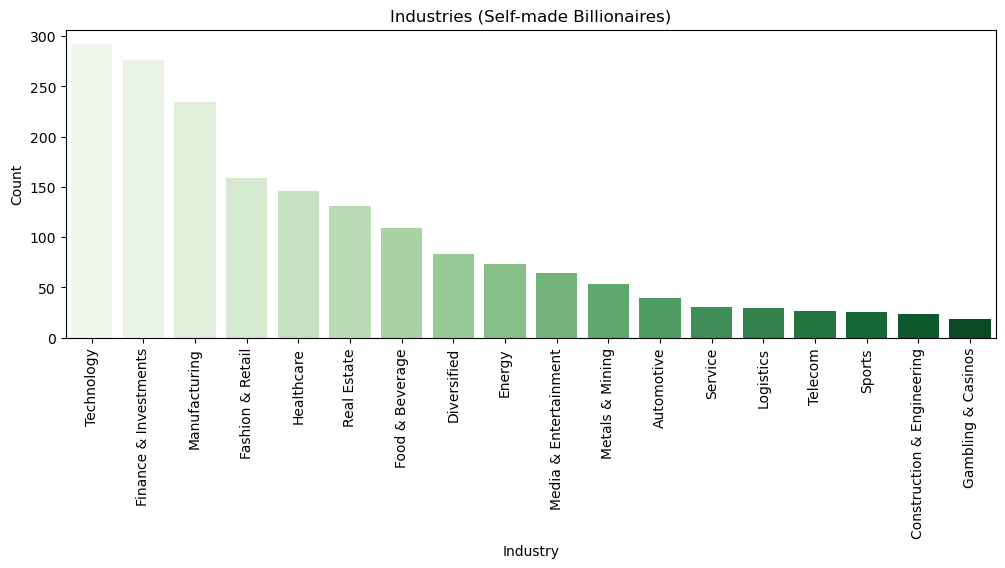

In [68]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(data=bill_selfMade, 
              x='industries',
              palette='Greens',
              order=bill_selfMade['industries'].value_counts().index).set(title="Industries (Self-made Billionaires)")
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Count');

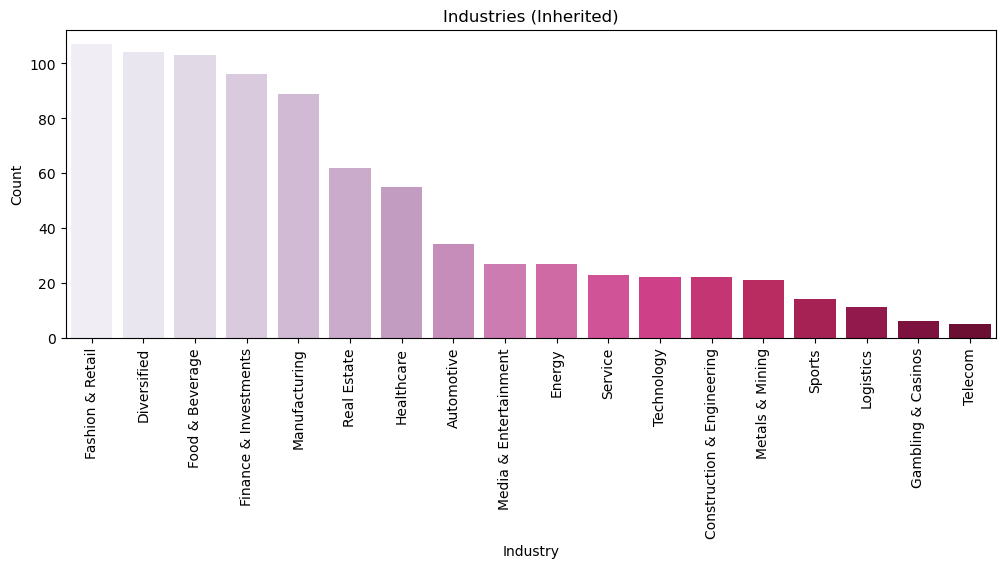

In [69]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(data=bill_inherited, 
              x='industries',
              palette='PuRd',
              order=bill_inherited['industries'].value_counts().index).set(title="Industries (Inherited)")
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Count');

In [70]:
bill_selfMade[['finalWorth', 'age']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,finalWorth,age
count,1812.00,1788.00
mean,4465397350.99,64.70
std,9455299245.86,12.93
min,1000000000.00,28.00
25%,1500000000.00,56.00
50%,2200000000.00,64.00
75%,4100000000.00,74.00
max,180000000000.00,101.00


In [71]:
bill_inherited[['finalWorth', 'age']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,finalWorth,age
count,828.00,787.00
mean,4970410628.02,66.15
std,10614182810.54,13.93
min,1000000000.00,18.00
25%,1600000000.00,58.00
50%,2600000000.00,68.00
75%,4625000000.00,76.00
max,211000000000.00,99.00


In [72]:
bill_selfMade.groupby(bill_selfMade.industries)[['finalWorth', 'age']].median().apply(lambda x: x.apply('{0:.2f}'.format))

,finalWorth,age
industries,,
Automotive,2600000000.00,61.00
Construction & Engineering,2100000000.00,69.00
Diversified,2100000000.00,68.00
Energy,2200000000.00,65.00
Fashion & Retail,2200000000.00,66.00
Finance & Investments,2700000000.00,65.00
Food & Beverage,2300000000.00,67.00
Gambling & Casinos,3100000000.00,75.00
Healthcare,2000000000.00,64.50


In [73]:
bill_inherited.groupby(bill_inherited.industries)[['finalWorth', 'age']].median().apply(lambda x: x.apply('{0:.2f}'.format))

,finalWorth,age
industries,,
Automotive,2550000000.00,73.00
Construction & Engineering,2050000000.00,62.00
Diversified,2450000000.00,69.00
Energy,2900000000.00,77.00
Fashion & Retail,3500000000.00,70.00
Finance & Investments,2300000000.00,65.00
Food & Beverage,2600000000.00,68.00
Gambling & Casinos,1750000000.00,70.50
Healthcare,2300000000.00,63.00


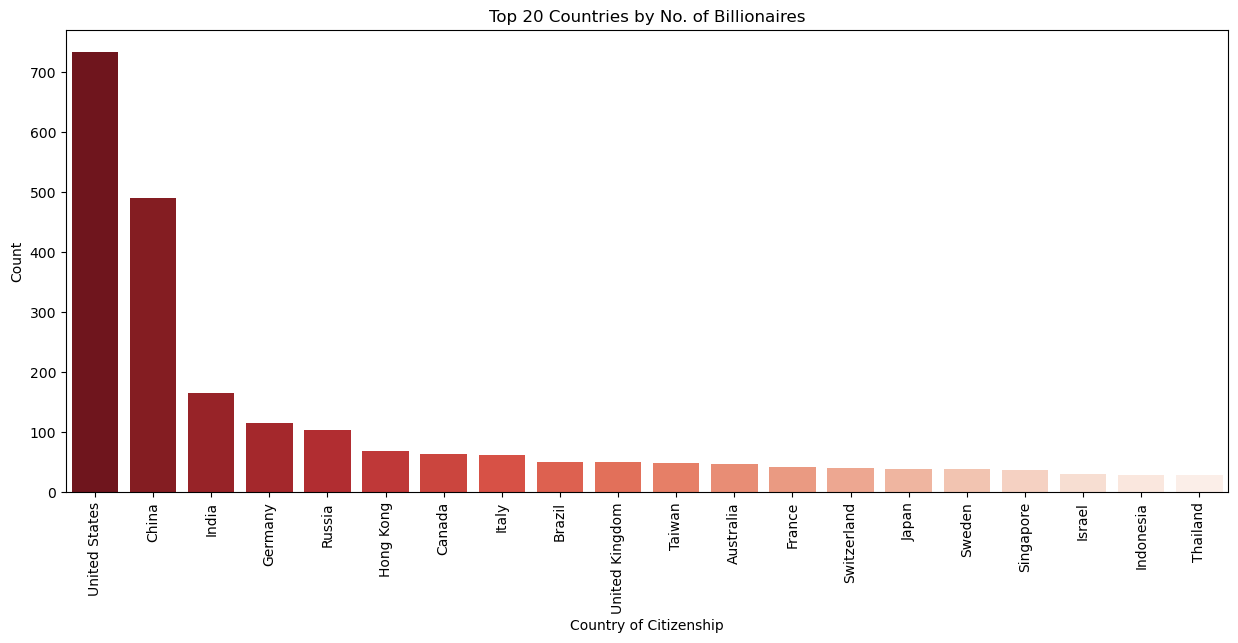

In [74]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=bill_country.countryOfCitizenship,
              palette='Reds_r',
              order=bill_country.countryOfCitizenship.value_counts().iloc[:20].index).set(title="Top 20 Countries by No. of Billionaires")
plt.xticks(rotation=90)
plt.xlabel('Country of Citizenship')
plt.ylabel('Count');

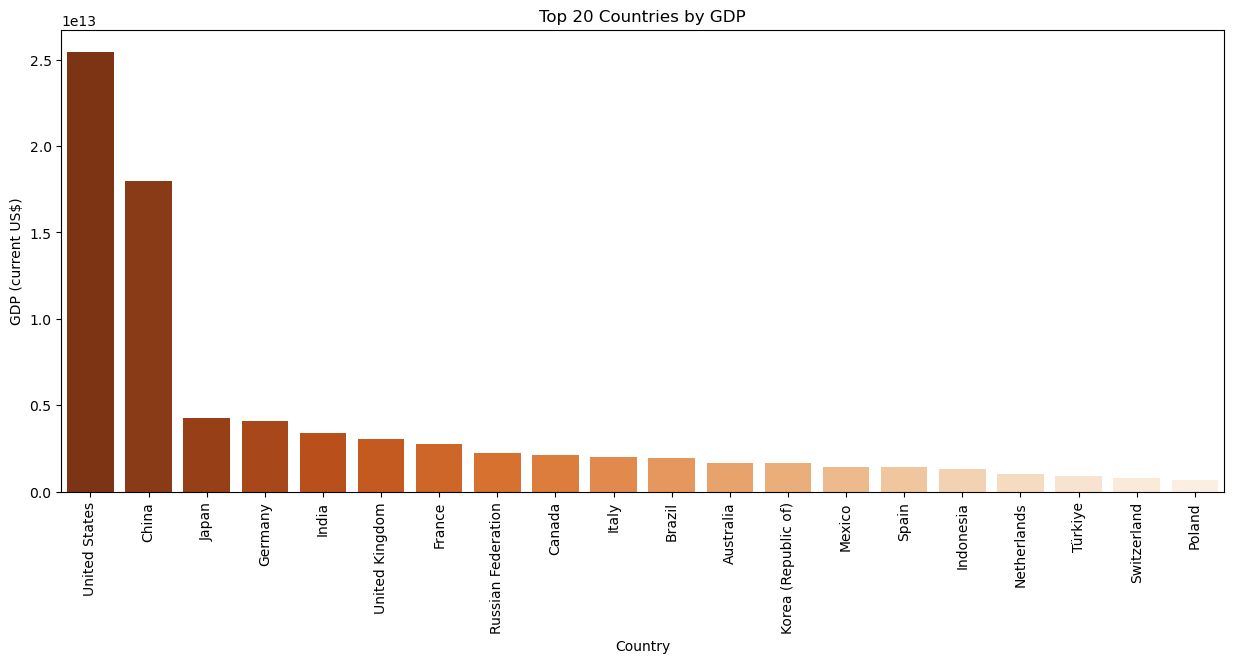

In [75]:
gdp_viz = bill_country[['country', 'gdp_2022']].drop_duplicates()

fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=gdp_viz.sort_values(by='gdp_2022', ascending=False).iloc[:20],
            x='country',
            y='gdp_2022',
            palette='Oranges_r').set(title="Top 20 Countries by GDP")
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP (current US$)');

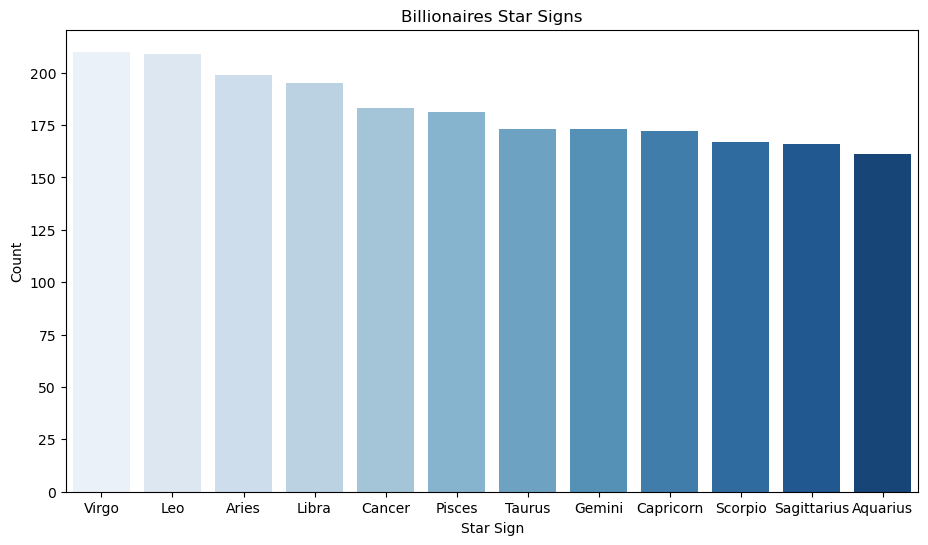

In [76]:
fig, ax = plt.subplots(figsize=(11,6))
sns.countplot(x=birthday.starSign,
              palette='Blues',
              order=birthday.starSign.value_counts().index).set(title="Billionaires Star Signs")
plt.xlabel('Star Sign')
plt.ylabel('Count');

In [77]:
ss_med = birthday.groupby(birthday.starSign)['finalWorth'].median()
ss_med.sort_values(ascending=False, inplace=True)

ss_med

starSign
Libra          2.800000e+09
Pisces         2.700000e+09
Virgo          2.650000e+09
Aquarius       2.500000e+09
Gemini         2.500000e+09
Leo            2.500000e+09
Taurus         2.500000e+09
Scorpio        2.400000e+09
Sagittarius    2.300000e+09
Aries          2.200000e+09
Cancer         2.100000e+09
Capricorn      2.000000e+09
Name: finalWorth, dtype: float64

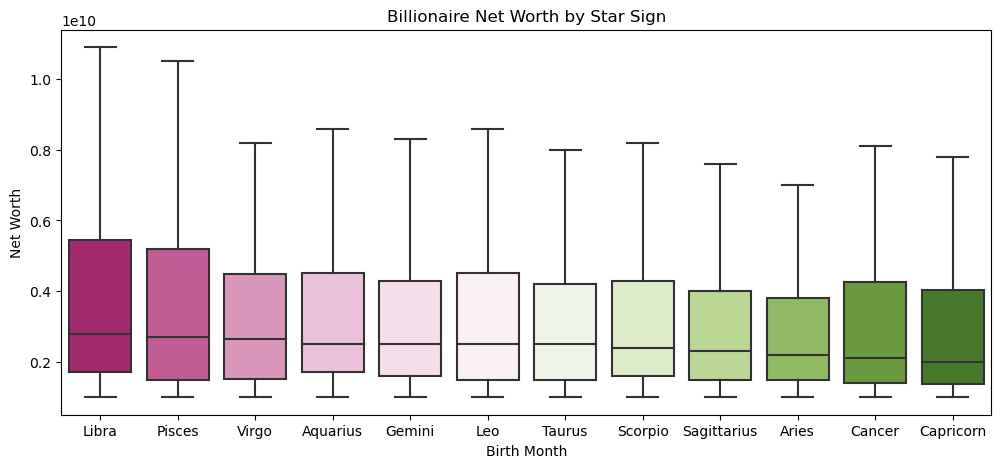

In [78]:
fig, axes = plt.subplots(figsize=(12,5))
sns.boxplot(x=birthday.starSign, 
            y=birthday.finalWorth,
            palette='PiYG',
            order=ss_med.index,
            showfliers=False).set(title='Billionaire Net Worth by Star Sign')

plt.xlabel('Birth Month')
plt.ylabel('Net Worth');